### 1. Importing packages

In [ ]:
!pip install pandas-datareader==0.10.0

In [ ]:
from pandas_datareader import data as web
from sklearn import mixture as mix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Loading dataset

In [ ]:
# loading SPDR S&P 500 ETF Trust (SPY) data from Yahoo Finance
spy_df = web.get_data_yahoo('SPY', start='2000-01-01', end='2020-12-31')
spy_df = spy_df[['Open', 'High', 'Low', 'Adj Close']]

### 3. Detecting regimes (market phases)

In [ ]:
# detecting regimes using Gaussian mixture model
regime_detector = mix.GaussianMixture(n_components=4, 
                                      covariance_type='spherical', 
                                      n_init=100, 
                                      random_state=14)

In [ ]:
# fitting regime detector
regime_detector.fit(np.reshape(spy_df, (-1, spy_df.shape[1])))
# predicting regimes
regimes = regime_detector.predict(np.reshape(spy_df, (-1, spy_df.shape[1])))

In [ ]:
# adding returns column
spy_df['Return'] = np.log(spy_df['Adj Close'] / spy_df['Adj Close'].shift(1))

In [ ]:
# creating regimes dataframe
regimes_df = pd.DataFrame(regimes, columns=['Regime'], index=spy_df.index)
regimes_df = regimes_df.join(spy_df, how='inner')
regimes_df['Cum Return'] = spy_df.Return.cumsum()
regimes_df.reset_index(drop=False, inplace=True)
regimes_df.rename(columns={'index':'Date'}, inplace=True)
regimes_df = regimes_df.iloc[1:,]

In [ ]:
regimes_df.head()

,Date,Regime,Open,High,Low,Adj Close,Return,Cum Return
1,2000-01-04,1,143.53125,144.06250,139.640625,93.067406,-0.039892,-0.039892
2,2000-01-05,1,139.93750,141.53125,137.250000,93.233894,0.001787,-0.038104
3,2000-01-06,1,139.62500,141.50000,137.750000,91.735497,-0.016202,-0.054306
4,2000-01-07,1,140.31250,145.75000,140.062500,97.063148,0.056452,0.002146
5,2000-01-10,1,146.25000,146.90625,145.031250,97.396126,0.003425,0.005571


### 4. Plotting and analyzing regimes

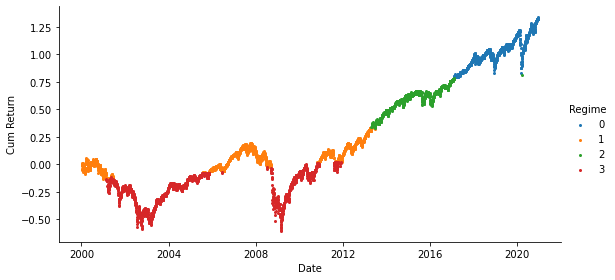

In [ ]:
order = [0, 1, 2, 3]
fig = sns.FacetGrid(data=regimes_df, hue='Regime', hue_order=order, aspect=2, height=4)
fig.map(plt.scatter, 'Date', 'Cum Return', s=4).add_legend()
plt.show()
# 0:'Distribution', 1:'Accumulation', 2:'Mark up', 3:'Mark down'

In [ ]:
for i in order:
    mean = round(regime_detector.means_[i][0], 4)
    cov = round(regime_detector.covariances_[i], 4)
    print(f'- Mean for Regime {i}      : {mean}')
    print(f'> Covariance for Regime {i}: {cov}')

- Mean for Regime 0      : 284.5393
> Covariance for Regime 0: 1141.6089
- Mean for Regime 1      : 137.5948
> Covariance for Regime 1: 89.2758
- Mean for Regime 2      : 197.8667
> Covariance for Regime 2: 297.0211
- Mean for Regime 3      : 106.8256
> Covariance for Regime 3: 142.1237
